In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import interpolate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.set_option('display.max_columns', None)
#pd.set_option('display.max_row', None)

In [2]:
import warnings
warnings.filterwarnings("ignore")

- 구름
  - HCDC : High Cloud Cover (%)  0
  - LCDC : Low Cloud Cover (%)    0
  - MCDC : Medium Cloud Cover (%)   0
  - TCAR :TOTAL CLOUD AMOUNT RANDOM OVERLAP
    
- 바람    
  - MXGUST : Maximum Wind Speed at 0 m above ground (m/s)   0
  - N50MU : 50 METRE WIND U-COMPONENT (m/s)
  - N50MV: 50 METRE WIND V-COMPONENT (m/s)
  - UGRD : U-Component of Wind at 10 m above ground
  - VGRD : V-Component of Wind at 10 m above ground

- 습도    
  - RH   0 
  - SPFH 
  
- 온도, 열
  - TMAX : Maximum Temperature at 1.5 m above ground
  - TMIN : Minimum Temperature at 1.5 m above ground
  - TMP : Temperature at 1.5 m above ground
  - NDNSW : NET DOWN SURFACE SW FLUX (지표면 장파복사열)
  - TDSWS : TOTAL DOWNWARD SURFACE SW FLUX
  - SWDIF : DIFFUSE SW FLUX (ON RHO LEVELS) at 2 m above ground
  - SWDIR : DIRECT SW FLUX (ON RHO LEVELS) at 2 m above ground

    
  - PRES : Pressure
  - PRMSL : PRMSL_meansealevel(해수면변화 측정)
  - DPT : 태양열의 흡수와 열교환을 목적으로 사용
  - VIS : Visibility at 1.5 m above ground(가시성)  0
  - NCPCP : Large-Scale Precipitation (non-convective) 대규모 강수량  0 
  - SNOL : Large-Scale Snow   0 

In [3]:
data = pd.read_csv('./data/사전과제_data(대외비).csv')
data.head()

,datetime,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
0,2019-06-28 0:00,0.0,292.83881,0.000000,0.208588,0.221466,3.682800,1.847509,2.763273,0.0,0.0,100128.39,100154.00,95.563927,0.0,0.014404,0.0,0.0,0.820679,0.0,293.55634,293.53430,293.66138,0.807296,2.454707,5253.2329
1,2019-06-28 1:00,0.0,292.88571,0.064789,0.278748,0.198456,5.553069,1.899890,4.664735,0.0,0.0,100141.63,100167.02,96.102135,0.0,0.014404,0.0,0.0,0.888611,0.0,293.57761,293.55603,293.68283,0.529665,4.009634,4458.9321
2,2019-06-28 2:00,0.0,293.00406,0.065216,0.411865,0.271515,6.369141,1.295991,5.426573,0.0,0.0,100132.73,100158.17,97.152420,0.0,0.014641,0.0,0.0,0.987091,0.0,293.55991,293.45306,293.72989,-0.389507,4.696301,3831.2681
3,2019-06-28 3:00,0.0,293.04767,0.015625,0.333740,0.180115,6.471650,0.326472,5.467535,0.0,0.0,100121.87,100148.17,97.398071,0.0,0.014649,0.0,0.0,0.987091,0.0,293.47855,293.45660,293.70828,-0.388263,4.385302,3789.1816
4,2019-06-28 4:00,0.0,293.06934,0.093750,0.294647,0.052338,6.159808,0.068942,5.358360,0.0,0.0,100135.45,100161.19,97.384186,0.0,0.014648,0.0,0.0,0.974213,0.0,293.47440,293.45651,293.68655,-0.329056,4.479684,4061.2871


In [4]:
data.head()

,datetime,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
0,2019-06-28 0:00,0.0,292.83881,0.000000,0.208588,0.221466,3.682800,1.847509,2.763273,0.0,0.0,100128.39,100154.00,95.563927,0.0,0.014404,0.0,0.0,0.820679,0.0,293.55634,293.53430,293.66138,0.807296,2.454707,5253.2329
1,2019-06-28 1:00,0.0,292.88571,0.064789,0.278748,0.198456,5.553069,1.899890,4.664735,0.0,0.0,100141.63,100167.02,96.102135,0.0,0.014404,0.0,0.0,0.888611,0.0,293.57761,293.55603,293.68283,0.529665,4.009634,4458.9321
2,2019-06-28 2:00,0.0,293.00406,0.065216,0.411865,0.271515,6.369141,1.295991,5.426573,0.0,0.0,100132.73,100158.17,97.152420,0.0,0.014641,0.0,0.0,0.987091,0.0,293.55991,293.45306,293.72989,-0.389507,4.696301,3831.2681
3,2019-06-28 3:00,0.0,293.04767,0.015625,0.333740,0.180115,6.471650,0.326472,5.467535,0.0,0.0,100121.87,100148.17,97.398071,0.0,0.014649,0.0,0.0,0.987091,0.0,293.47855,293.45660,293.70828,-0.388263,4.385302,3789.1816
4,2019-06-28 4:00,0.0,293.06934,0.093750,0.294647,0.052338,6.159808,0.068942,5.358360,0.0,0.0,100135.45,100161.19,97.384186,0.0,0.014648,0.0,0.0,0.974213,0.0,293.47440,293.45651,293.68655,-0.329056,4.479684,4061.2871


In [5]:
data.describe()

,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
count,22662.000000,22494.000000,22494.000000,22494.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000
mean,10480.569321,282.608439,0.298232,0.311569,0.226534,8.514256,1.703122,-0.497501,0.144576,163.955344,101572.642926,101604.898699,77.585871,0.001651,0.008702,63.394058,114.321061,0.693976,177.676412,286.802096,286.399237,288.528413,0.924964,-0.965852,24713.720017
std,16256.016690,9.512896,0.370127,0.371906,0.355870,4.689025,4.653624,5.370105,1.404132,245.436310,862.941092,863.646625,13.563617,0.033077,0.005173,90.200236,208.266613,0.407181,263.125027,8.456487,8.491048,7.353683,3.695723,4.445996,16993.617704
min,0.000000,257.834350,0.000000,0.000000,0.000000,0.789551,-21.822517,-21.447340,0.000000,0.000000,97939.086000,97964.180000,30.477089,0.000000,0.001178,0.000000,0.000000,0.000000,0.000000,267.138550,266.406220,275.928280,-18.615330,-18.573994,19.106869
25%,0.000000,274.923080,0.000000,0.000000,0.000000,5.037655,-1.135010,-4.172215,0.000000,0.000000,100903.970000,100934.805000,66.815433,0.000000,0.004302,0.000000,0.000000,0.278564,0.000000,279.522335,279.146572,281.285500,-1.444218,-3.791789,11360.670250
50%,0.000000,282.326445,0.062500,0.101593,0.000000,7.480424,1.527756,-0.938543,0.000000,5.501953,101636.750000,101677.805000,78.428546,0.000000,0.007131,5.524490,0.000000,0.982147,6.096680,287.079695,286.631680,288.640670,0.743261,-1.337835,21077.447500
75%,16985.587750,291.457975,0.593750,0.630463,0.380135,10.870264,4.403746,2.647588,0.000000,272.998857,102239.610000,102270.630000,88.971813,0.000000,0.013141,99.369844,130.015625,1.000000,301.744157,294.685203,294.326908,295.536107,3.159547,1.662547,34966.373750
max,63475.351000,299.287320,1.000006,1.000000,1.000000,38.869167,25.704344,30.286469,54.830078,980.527830,103644.550000,103673.340000,104.500310,2.016602,0.021400,529.763610,936.984380,1.000008,1035.399200,304.775630,304.524960,302.365600,19.557364,25.152510,93041.609000


In [6]:
# column들의 count수가 다름 
# 결측치 조회
data.isna().sum()

datetime      0
Power         0
DPT         168
HCDC        168
LCDC        168
MCDC        192
MXGUST      192
N50MU       192
N50MV       192
NCPCP       192
NDNSW       192
PRES        192
PRMSL       192
RH          192
SNOL        192
SPFH        192
SWDIF       192
SWDIR       192
TCAR        192
TDSWS       192
TMAX        192
TMIN        192
TMP         192
UGRD        192
VGRD        192
VIS         192
dtype: int64

In [7]:
#선형보간법

data=data.interpolate(method="linear")

In [8]:
#결측치 해결
data.isna().sum()

datetime    0
Power       0
DPT         0
HCDC        0
LCDC        0
MCDC        0
MXGUST      0
N50MU       0
N50MV       0
NCPCP       0
NDNSW       0
PRES        0
PRMSL       0
RH          0
SNOL        0
SPFH        0
SWDIF       0
SWDIR       0
TCAR        0
TDSWS       0
TMAX        0
TMIN        0
TMP         0
UGRD        0
VGRD        0
VIS         0
dtype: int64

In [9]:
data.describe()

,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
count,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000
mean,10480.569321,282.613203,0.298466,0.312431,0.226684,8.522978,1.719405,-0.520225,0.143352,162.566260,101573.625019,101605.840526,77.539134,0.001637,0.008703,62.856962,113.352495,0.695344,176.171078,286.807468,286.404303,288.538701,0.935677,-0.985685,24737.154847
std,16256.016690,9.519852,0.370125,0.372057,0.355199,4.681217,4.652569,5.357747,1.398234,244.855923,863.448116,864.152104,13.535794,0.032937,0.005181,90.005053,207.646991,0.406331,262.513584,8.460699,8.495088,7.357904,3.699873,4.436807,16954.767573
min,0.000000,257.834350,0.000000,0.000000,0.000000,0.789551,-21.822517,-21.447340,0.000000,0.000000,97939.086000,97964.180000,30.477089,0.000000,0.001178,0.000000,0.000000,0.000000,0.000000,267.138550,266.406220,275.928280,-18.615330,-18.573994,19.106869
25%,0.000000,274.893690,0.000000,0.000000,0.000000,5.037655,-1.123986,-4.185865,0.000000,0.000000,100903.970000,100934.805000,66.779451,0.000000,0.004267,0.000000,0.000000,0.284393,0.000000,279.540487,279.168550,281.341093,-1.441672,-3.806664,11440.719500
50%,0.000000,282.307465,0.062500,0.103851,0.000000,7.497317,1.539925,-0.975609,0.000000,4.441895,101640.110000,101681.695000,78.326630,0.000000,0.007121,4.396240,0.000000,0.982086,4.900391,287.058275,286.601655,288.607805,0.752693,-1.360119,21129.002000
75%,16985.587750,291.481825,0.593750,0.634148,0.379662,10.925629,4.438017,2.597841,0.000000,269.275047,102243.747500,102274.007500,88.885521,0.000000,0.013141,98.855202,126.611328,1.000000,297.518740,294.705803,294.353142,295.556657,3.183374,1.632480,35002.008750
max,63475.351000,299.287320,1.000006,1.000000,1.000000,38.869167,25.704344,30.286469,54.830078,980.527830,103644.550000,103673.340000,104.500310,2.016602,0.021400,529.763610,936.984380,1.000008,1035.399200,304.775630,304.524960,302.365600,19.557364,25.152510,93041.609000


### 다중 선형회귀로 feature의 p-value 확인

In [10]:
target=data[['Power']]

In [11]:
x_data = data[[ 'DPT', 'HCDC', 'LCDC', 'MCDC', 'MXGUST', 'N50MU',
       'N50MV', 'NCPCP', 'NDNSW', 'PRES', 'PRMSL', 'RH', 'SNOL', 'SPFH',
       'SWDIF', 'SWDIR', 'TCAR', 'TDSWS', 'TMAX', 'TMIN', 'TMP', 'UGRD',
       'VGRD', 'VIS']]
x_data.head()

,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
0,292.83881,0.000000,0.208588,0.221466,3.682800,1.847509,2.763273,0.0,0.0,100128.39,100154.00,95.563927,0.0,0.014404,0.0,0.0,0.820679,0.0,293.55634,293.53430,293.66138,0.807296,2.454707,5253.2329
1,292.88571,0.064789,0.278748,0.198456,5.553069,1.899890,4.664735,0.0,0.0,100141.63,100167.02,96.102135,0.0,0.014404,0.0,0.0,0.888611,0.0,293.57761,293.55603,293.68283,0.529665,4.009634,4458.9321
2,293.00406,0.065216,0.411865,0.271515,6.369141,1.295991,5.426573,0.0,0.0,100132.73,100158.17,97.152420,0.0,0.014641,0.0,0.0,0.987091,0.0,293.55991,293.45306,293.72989,-0.389507,4.696301,3831.2681
3,293.04767,0.015625,0.333740,0.180115,6.471650,0.326472,5.467535,0.0,0.0,100121.87,100148.17,97.398071,0.0,0.014649,0.0,0.0,0.987091,0.0,293.47855,293.45660,293.70828,-0.388263,4.385302,3789.1816
4,293.06934,0.093750,0.294647,0.052338,6.159808,0.068942,5.358360,0.0,0.0,100135.45,100161.19,97.384186,0.0,0.014648,0.0,0.0,0.974213,0.0,293.47440,293.45651,293.68655,-0.329056,4.479684,4061.2871


In [12]:
x_data1 = sm.add_constant(x_data, has_constant='add')

multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [13]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     3084.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:27:55   Log-Likelihood:            -2.3544e+05
No. Observations:               22662   AIC:                         4.709e+05
Df Residuals:                   22637   BIC:                         4.711e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.889e+04   1.46e+04     -4.027      0.000   -8.76e+04   -3.02e+04
DPT         3044.9736    153.498     19.837      0.000    2744.107    3345.840
HCDC          91.1538    203.008      0.449      0.653    -306.756     489.064
LCDC        2886.4995    212.938     13.556      0.000    2469.126    3303.873
MCDC        1192.3495    186.977      6.377      0.000     825.862    1558.837
MXGUST       -98.2256     16.795     -5.849      0.000    -131.144     -65.307
N50MU       -422.0110     52.764     -7.998      0.000    -525.433    -318.589
N50MV        -77.3760     48.023     -1.611      0.107    -171.505      16.753
NCPCP        186.0105     40.739      4.566      0.000     106.160     265.861
NDNSW         10.0955      9.877      1.022      0.307      -9.264      29.455
PRES           2.8350      2.414      1.174      0.240      -1.897       7.567
PRMSL         -1.7685      2.419     -0.731      0.465      -6.511       2.973
RH          -625.8009     29.839    -20.972      0.000    -684.288    -567.313
SNOL        2077.2406   1630.412      1.274      0.203   -1118.478    5272.960
SPFH        2.769e+04   4.63e+04      0.598      0.550   -6.31e+04    1.18e+05
SWDIF        198.2670    166.892      1.188      0.235    -128.852     525.386
SWDIR        187.6816    166.992      1.124      0.261    -139.634     514.997
TCAR       -2774.4687    211.290    -13.131      0.000   -3188.612   -2360.325
TDSWS       -146.3436    167.099     -0.876      0.381    -473.869     181.182
TMAX          17.7795    178.918      0.099      0.921    -332.913     368.472
TMIN       -3562.0306    171.030    -20.827      0.000   -3897.262   -3226.799
TMP          539.6971     31.963     16.885      0.000     477.048     602.346
UGRD         256.5712     66.505      3.858      0.000     126.217     386.925
VGRD         140.7091     57.977      2.427      0.015      27.070     254.348
VIS            0.0292      0.004      6.941      0.000       0.021       0.037
==============================================================================
Omnibus:                     2704.361   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10910.581
Skew:                           0.547   Prob(JB):                         0.00
Kurtosis:                       6.218   Cond. No.                     1.30e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### column의 vif 지수 확인

In [14]:
data_cloud = data[['Power',"HCDC", "LCDC", "MCDC", "TCAR"]]
data_cloud.head()

,Power,HCDC,LCDC,MCDC,TCAR
0,0.0,0.000000,0.208588,0.221466,0.820679
1,0.0,0.064789,0.278748,0.198456,0.888611
2,0.0,0.065216,0.411865,0.271515,0.987091
3,0.0,0.015625,0.333740,0.180115,0.987091
4,0.0,0.093750,0.294647,0.052338,0.974213


In [15]:
vif_cloud=pd.DataFrame()
vif_cloud["VIF Factor"]=[variance_inflation_factor(data_cloud.values, i) 
                        for i in range(data_cloud.shape[1])]
vif_cloud['features'] = data_cloud.columns
vif_cloud

,VIF Factor,features
0,1.212167,Power
1,3.091291,HCDC
2,2.979852,LCDC
3,1.995713,MCDC
4,6.087622,TCAR


In [16]:
data_wind = data[['Power','MXGUST',"N50MU", "N50MV", "UGRD", "VGRD"]]
data_wind.head()

,Power,MXGUST,N50MU,N50MV,UGRD,VGRD
0,0.0,3.682800,1.847509,2.763273,0.807296,2.454707
1,0.0,5.553069,1.899890,4.664735,0.529665,4.009634
2,0.0,6.369141,1.295991,5.426573,-0.389507,4.696301
3,0.0,6.471650,0.326472,5.467535,-0.388263,4.385302
4,0.0,6.159808,0.068942,5.358360,-0.329056,4.479684


In [17]:
vif_wind=pd.DataFrame()
vif_wind["VIF Factor"]=[variance_inflation_factor(data_wind.values, i) 
                        for i in range(data_wind.shape[1])]
vif_wind['features'] = data_wind.columns
vif_wind

,VIF Factor,features
0,1.362693,Power
1,2.327511,MXGUST
2,22.553451,N50MU
3,20.959244,N50MV
4,20.219341,UGRD
5,22.252110,VGRD


In [18]:
data_hot = data[['Power','TMAX',"TMIN","TMP", "NDNSW", "TDSWS", 'SWDIF','SWDIR']]
data_hot.head()

,Power,TMAX,TMIN,TMP,NDNSW,TDSWS,SWDIF,SWDIR
0,0.0,293.55634,293.53430,293.66138,0.0,0.0,0.0,0.0
1,0.0,293.57761,293.55603,293.68283,0.0,0.0,0.0,0.0
2,0.0,293.55991,293.45306,293.72989,0.0,0.0,0.0,0.0
3,0.0,293.47855,293.45660,293.70828,0.0,0.0,0.0,0.0
4,0.0,293.47440,293.45651,293.68655,0.0,0.0,0.0,0.0


In [19]:
vif_hot=pd.DataFrame()
vif_hot["VIF Factor"]=[variance_inflation_factor(data_hot.values, i) 
                        for i in range(data_hot.shape[1])]
vif_hot['features'] = data_hot.columns
vif_hot

,VIF Factor,features
0,5.636557,Power
1,635337.461885,TMAX
2,614461.254559,TMIN
3,13729.283346,TMP
4,2459.766845,NDNSW
5,988659.079015,TDSWS
6,119047.194631,SWDIF
7,553585.078581,SWDIR


In [20]:
data_etc = data[['Power','PRES',"PRMSL","DPT", "VIS", "NCPCP", 'SNOL']]
data_etc.head()

,Power,PRES,PRMSL,DPT,VIS,NCPCP,SNOL
0,0.0,100128.39,100154.00,292.83881,5253.2329,0.0,0.0
1,0.0,100141.63,100167.02,292.88571,4458.9321,0.0,0.0
2,0.0,100132.73,100158.17,293.00406,3831.2681,0.0,0.0
3,0.0,100121.87,100148.17,293.04767,3789.1816,0.0,0.0
4,0.0,100135.45,100161.19,293.06934,4061.2871,0.0,0.0


In [21]:
vif_etc=pd.DataFrame()
vif_etc["VIF Factor"]=[variance_inflation_factor(data_etc.values, i) 
                        for i in range(data_etc.shape[1])]
vif_etc['features'] = data_etc.columns
vif_etc


,VIF Factor,features
0,1.445562e+00,Power
1,1.763291e+07,PRES
2,1.761924e+07,PRMSL
3,6.284320e+02,DPT
4,3.452639e+00,VIS
5,1.109228e+00,NCPCP
6,1.007113e+00,SNOL


In [22]:
data_h = data[['Power','SPFH', 'RH']]
data_h .head()

,Power,SPFH,RH
0,0.0,0.014404,95.563927
1,0.0,0.014404,96.102135
2,0.0,0.014641,97.152420
3,0.0,0.014649,97.398071
4,0.0,0.014648,97.384186


In [23]:
vif_h=pd.DataFrame()
vif_h["VIF Factor"]=[variance_inflation_factor(data_h.values, i) 
                        for i in range(data_h.shape[1])]
vif_h['features'] = data_h.columns
vif_h

,VIF Factor,features
0,1.337394,Power
1,5.022345,SPFH
2,5.357322,RH


#### p-value 0.05이상, VIF 수치 10이상인 column 제거 

In [32]:
data_set = data[['datetime','Power','TCAR','LCDC', 'MCDC', 'MXGUST', 'NDNSW', 'VIS','RH', 'NCPCP', 'SNOL' ]]
data_set.head()

,datetime,Power,TCAR,LCDC,MCDC,MXGUST,NDNSW,VIS,RH,NCPCP,SNOL
0,2019-06-28 0:00,0.0,0.820679,0.208588,0.221466,3.682800,0.0,5253.2329,95.563927,0.0,0.0
1,2019-06-28 1:00,0.0,0.888611,0.278748,0.198456,5.553069,0.0,4458.9321,96.102135,0.0,0.0
2,2019-06-28 2:00,0.0,0.987091,0.411865,0.271515,6.369141,0.0,3831.2681,97.152420,0.0,0.0
3,2019-06-28 3:00,0.0,0.987091,0.333740,0.180115,6.471650,0.0,3789.1816,97.398071,0.0,0.0
4,2019-06-28 4:00,0.0,0.974213,0.294647,0.052338,6.159808,0.0,4061.2871,97.384186,0.0,0.0


datetime의 시간을 새로운 column으로 만들기

In [33]:
b = data_set['datetime']
b

0         2019-06-28 0:00
1         2019-06-28 1:00
2         2019-06-28 2:00
3         2019-06-28 3:00
4         2019-06-28 4:00
               ...       
22657    2022-03-24 19:00
22658    2022-03-24 20:00
22659    2022-03-24 21:00
22660    2022-03-24 22:00
22661    2022-03-24 23:00
Name: datetime, Length: 22662, dtype: object

In [34]:
hour_list = []
for i in range(len(b)):        # data_setd
    hour = b[i].split(sep = ' ')    # 날짜와 시간을 나누기
    hour_01 = hour[1]               # 나눈 시간을 houer_01에 넣기 
    hour_list.append(hour_01)       # hour_list에 datetime의 시간 저장
    
print(hour_list)

['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:0

In [39]:
data_set['hour'] = hour_list

In [45]:
# 'hour'의 type을 float으로 바뀌기
ab_list = []
for i in range(len(hour_list)):
    ab = hour_list[i].split(sep=':')
    ab_01 = ab[0]
    ab_list.append(ab_01)

In [46]:
data_set['hour'] = ab_list

In [47]:
data_set['hour'] = data_set['hour'].astype('float')

In [48]:
data_set['hour']

0         0.0
1         1.0
2         2.0
3         3.0
4         4.0
         ... 
22657    19.0
22658    20.0
22659    21.0
22660    22.0
22661    23.0
Name: hour, Length: 22662, dtype: float64

In [49]:
data_set.head()

,datetime,Power,TCAR,LCDC,MCDC,MXGUST,NDNSW,VIS,RH,NCPCP,SNOL,hour
0,2019-06-28 0:00,0.0,0.820679,0.208588,0.221466,3.682800,0.0,5253.2329,95.563927,0.0,0.0,0.0
1,2019-06-28 1:00,0.0,0.888611,0.278748,0.198456,5.553069,0.0,4458.9321,96.102135,0.0,0.0,1.0
2,2019-06-28 2:00,0.0,0.987091,0.411865,0.271515,6.369141,0.0,3831.2681,97.152420,0.0,0.0,2.0
3,2019-06-28 3:00,0.0,0.987091,0.333740,0.180115,6.471650,0.0,3789.1816,97.398071,0.0,0.0,3.0
4,2019-06-28 4:00,0.0,0.974213,0.294647,0.052338,6.159808,0.0,4061.2871,97.384186,0.0,0.0,4.0


train과 test를 나누기 위한 과정

In [50]:
# datetimne으로 dtype바꾸기
data_set['datetime']=pd.to_datetime(data_set['datetime'])

In [51]:
# 년과 월을 추출
data_set['year'], data_set['month'] = (data_set['datetime'].dt.year, data_set['datetime'].dt.month)

In [52]:
data_set.head()

,datetime,Power,TCAR,LCDC,MCDC,MXGUST,NDNSW,VIS,RH,NCPCP,SNOL,hour,year,month
0,2019-06-28 00:00:00,0.0,0.820679,0.208588,0.221466,3.682800,0.0,5253.2329,95.563927,0.0,0.0,0.0,2019,6
1,2019-06-28 01:00:00,0.0,0.888611,0.278748,0.198456,5.553069,0.0,4458.9321,96.102135,0.0,0.0,1.0,2019,6
2,2019-06-28 02:00:00,0.0,0.987091,0.411865,0.271515,6.369141,0.0,3831.2681,97.152420,0.0,0.0,2.0,2019,6
3,2019-06-28 03:00:00,0.0,0.987091,0.333740,0.180115,6.471650,0.0,3789.1816,97.398071,0.0,0.0,3.0,2019,6
4,2019-06-28 04:00:00,0.0,0.974213,0.294647,0.052338,6.159808,0.0,4061.2871,97.384186,0.0,0.0,4.0,2019,6


In [53]:
data_set.shape

(22662, 14)

In [54]:
data_2022 = data_set[data_set['year'] == 2022] 
data_2022_02 = data_2022[data_2022['month'] == 2]
data_2022_03 = data_2022[data_2022['month'] == 3]

In [55]:
data_2022_2_3 = pd.concat([data_2022_02,data_2022_03])
data_2022_2_3.shape

(1196, 14)

In [57]:
test1 = data_2022_2_3
test1.head()

,datetime,Power,TCAR,LCDC,MCDC,MXGUST,NDNSW,VIS,RH,NCPCP,SNOL,hour,year,month
21466,2022-02-01 00:00:00,0.0,0.760986,0.283417,0.000000,15.154617,0.0,32979.238,58.885040,0.0,0.0,0.0,2022,2
21467,2022-02-01 01:00:00,0.0,0.924530,0.434326,0.000000,15.900749,0.0,36044.000,58.231621,0.0,0.0,1.0,2022,2
21468,2022-02-01 02:00:00,0.0,0.964111,0.673645,0.000000,16.008425,0.0,36249.000,59.268524,0.0,0.0,2.0,2022,2
21469,2022-02-01 03:00:00,0.0,0.115723,0.102814,0.000000,19.012800,0.0,35486.000,54.056423,0.0,0.0,3.0,2022,2
21470,2022-02-01 04:00:00,0.0,0.999512,0.836975,0.009155,18.997683,0.0,35616.281,56.179863,0.0,0.0,4.0,2022,2


In [59]:
# 그래프의 x축
plot_x = test1['datetime']

In [60]:
train = data_set.iloc[:21466]
train.tail()

,datetime,Power,TCAR,LCDC,MCDC,MXGUST,NDNSW,VIS,RH,NCPCP,SNOL,hour,year,month
21461,2022-01-31 11:00:00,46066.928,0.909027,0.000000,0.344238,3.728177,423.00885,29609.002,59.146481,0.0,0.0,11.0,2022,1
21462,2022-01-31 12:00:00,48507.611,0.984375,0.023285,0.578613,3.740540,513.66553,28262.000,60.303120,0.0,0.0,12.0,2022,1
21463,2022-01-31 13:00:00,44274.531,0.973755,0.045135,0.555054,3.820948,553.76196,30123.146,61.261559,0.0,0.0,13.0,2022,1
21464,2022-01-31 14:00:00,46478.126,0.906250,0.051880,0.375000,3.354513,548.42432,32258.000,59.072392,0.0,0.0,14.0,2022,1
21465,2022-01-31 15:00:00,32733.292,0.849030,0.353668,0.281250,4.047720,483.24557,30350.000,59.720589,0.0,0.0,15.0,2022,1


In [61]:
test = test1.drop(['month', 'year', 'datetime'],axis = 1)
train = train.drop(['month', 'year', 'datetime'],axis = 1)

test

,Power,TCAR,LCDC,MCDC,MXGUST,NDNSW,VIS,RH,NCPCP,SNOL,hour
21466,0.000,0.760986,0.283417,0.000000,15.154617,0.000000,32979.2380,58.885040,0.0,0.0,0.0
21467,0.000,0.924530,0.434326,0.000000,15.900749,0.000000,36044.0000,58.231621,0.0,0.0,1.0
21468,0.000,0.964111,0.673645,0.000000,16.008425,0.000000,36249.0000,59.268524,0.0,0.0,2.0
21469,0.000,0.115723,0.102814,0.000000,19.012800,0.000000,35486.0000,54.056423,0.0,0.0,3.0
21470,0.000,0.999512,0.836975,0.009155,18.997683,0.000000,35616.2810,56.179863,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
22657,26.689,0.937500,0.000000,0.000000,7.390634,34.941406,13642.1750,91.081940,0.0,0.0,19.0
22658,0.000,1.000000,0.000000,0.000000,7.339590,0.000000,12770.0630,90.620232,0.0,0.0,20.0
22659,0.000,1.000000,0.000000,0.000000,5.271782,0.000000,12082.2650,90.612701,0.0,0.0,21.0
22660,0.000,1.000000,0.000000,0.519623,4.706657,0.000000,10683.3490,90.754486,0.0,0.0,22.0


In [73]:
X_train = train.drop(['Power'], axis=1)
X_test = test.drop(['Power'], axis=1)

y_train = train['Power']
y_test = test['Power']
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21466, 10) (1196, 10) (21466,) (1196,)


In [109]:
rfr = RandomForestRegressor()

In [110]:
rfr = RandomForestRegressor()
model = rfr.fit(X_train, y_train)

In [111]:
pred = model.predict(X_test)

In [112]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_test, pred)

2.420038879110956

In [113]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [114]:
test_list = list(y_test)

In [115]:
y_test

21466     0.000
21467     0.000
21468     0.000
21469     0.000
21470     0.000
          ...  
22657    26.689
22658     0.000
22659     0.000
22660     0.000
22661     0.000
Name: Power, Length: 1196, dtype: float64

In [116]:
## 평가지표

list_test = []
for i in range(len(test_list)):
    score_01 = (1-(abs(test_list[i]-pred[i])/65000))*100
    list_test.append(score_01)
    
list_test

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.86605592307693,
 99.64038155384615,
 95.69988955384615,
 72.32375929230768,
 66.25462543076924,
 59.44298464615386,
 75.10037635384617,
 56.5121190615385,
 85.6995532,
 75.23647761538462,
 84.51239027692307,
 99.21336392307693,
 99.93310439999999,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.83088773846154,
 99.87470126153846,
 94.27587144615384,
 75.99398118461538,
 78.3757466461538,
 59.225733000000005,
 69.5238110769231,
 68.45423095384615,
 74.06067147692309,
 80.63412903076923,
 74.48964707692308,
 95.2356665076923,
 99.99135569230769,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.9605878,
 93.17417132307693,
 93.13695781538458,
 95.39836226153847,
 90.11274633846153,
 84.52443776923077,
 81.97390918461538,
 79.14182021538461,
 82.42021626153843,
 86.14448164615386,
 98.24812403076923,
 99.98751161538462,
 100.0,
 100.0,
 100.0,
 

In [117]:
np.mean(list_test)

95.21379118820428

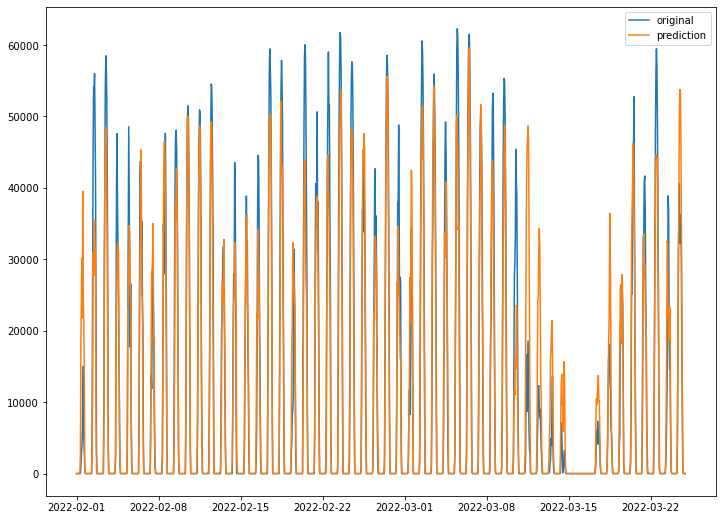

In [118]:
plt.figure(figsize=(12, 9))
plt.plot( plot_x, y_test,label='original')
plt.plot( plot_x, pred,label='prediction')
plt.legend()
plt.show()